# Dimension reduction

In [70]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
df = pd.read_csv("winequality-red.csv")

In [ ]:
pca=PCA()
df_red = PCA(n_components=2).fit_transform(df)

fig = px.scatter_matrix(
    df_red,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE()
df_new = TSNE(n_components=2).fit_transform(df)

fig = px.scatter_matrix(
    df_new,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [ ]:
from PIL import Image


In [ ]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving batterfly.jpg to batterfly.jpg


In [ ]:
def recreate_image(codebook,labels,width,height):
    d=codebook.shape[1]
    im=np.zeros((width,height,d))
    label_idx=0
    for i in range(width):
        for j in range(height):
            im[i][j]=codebook[labels[label_idx]]
            label_idx+=1
    return im

In [ ]:
data_img=Image.open('batterfly.jpg')

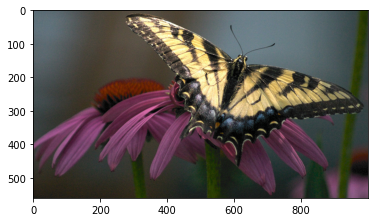

In [ ]:
n_colors=64
data=np.array(data_img,dtype=np.float64)/255
plt.imshow(data)

In [ ]:
w,h,d=tuple(data.shape)
data_array=np.reshape(data,(w*h,d))
print(data_array.shape)

(560000, 3)


In [ ]:
img_sample=shuffle(data_array,random_state=0)[:1000]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model=KMeans(n_clusters=n_colors,random_state=0).fit(img_sample)

In [ ]:
colors=model.predict(data_array)

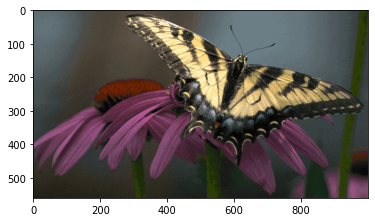

In [ ]:
plt.imshow(recreate_image(model.cluster_centers_,colors,w,h))

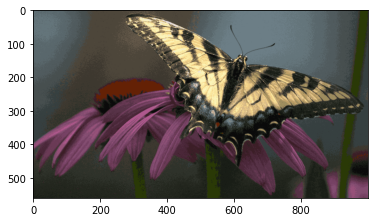

In [ ]:
n_colors=32
img_sample=shuffle(data_array,random_state=0)[:1000]
model=KMeans(n_clusters=n_colors,random_state=0).fit(img_sample)
colors=model.predict(data_array)
plt.imshow(recreate_image(model.cluster_centers_,colors,w,h))

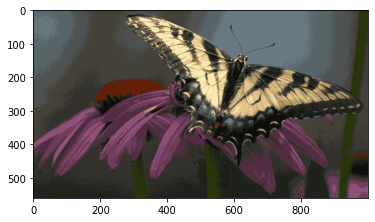

In [ ]:
n_colors=16
img_sample=shuffle(data_array,random_state=0)[:1000]
model=KMeans(n_clusters=n_colors,random_state=0).fit(img_sample)
colors=model.predict(data_array)
plt.imshow(recreate_image(model.cluster_centers_,colors,w,h))

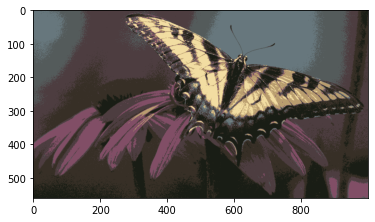

In [ ]:
n_colors=8
img_sample=shuffle(data_array,random_state=0)[:1000]
model=KMeans(n_clusters=n_colors,random_state=0).fit(img_sample)
colors=model.predict(data_array)
plt.imshow(recreate_image(model.cluster_centers_,colors,w,h))

In [ ]:
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


For n_clusters = 4 The average silhouette_score is : 0.6368316397517328
For n_clusters = 5 The average silhouette_score is : 0.7421482179950815
For n_clusters = 6 The average silhouette_score is : 0.6553995730586305


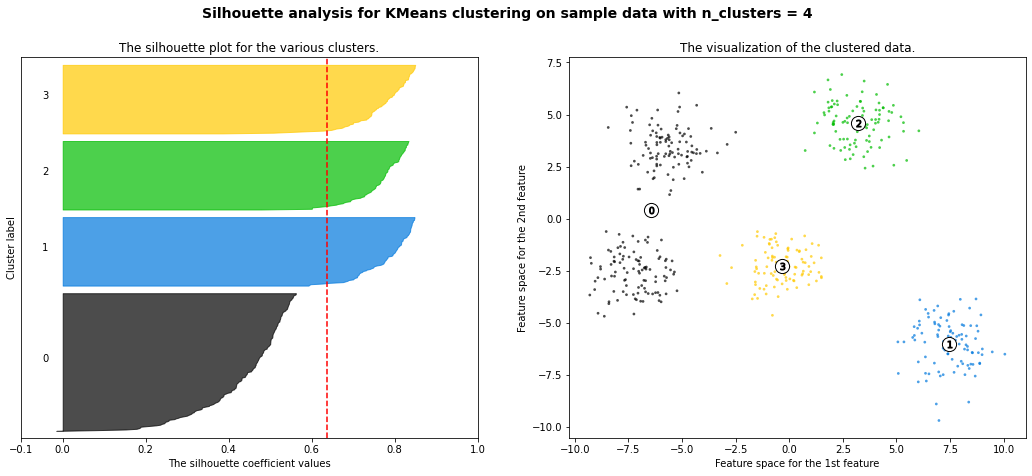

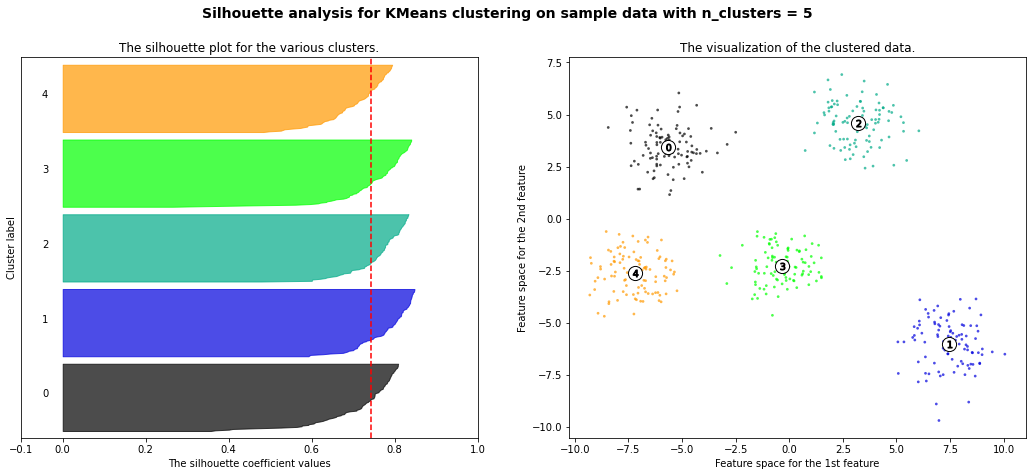

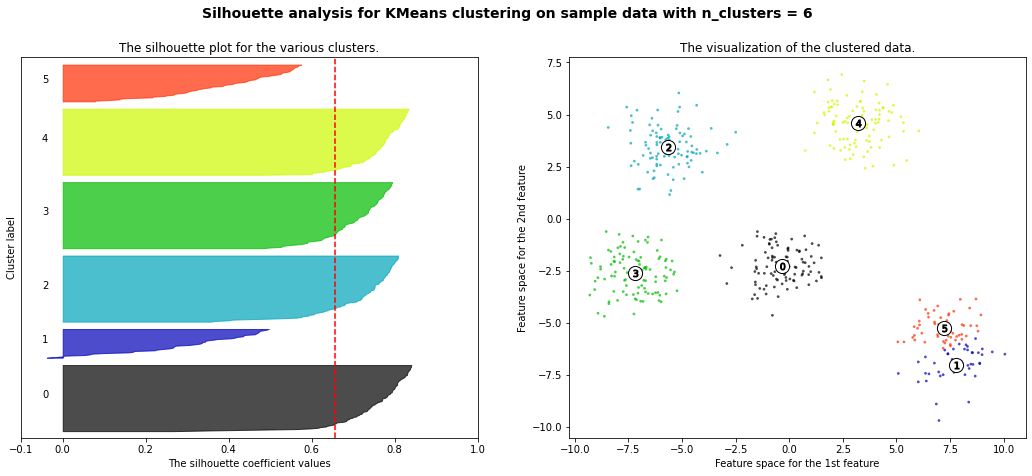

In [ ]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-8.0, 8.0),
                  shuffle=True)  # For reproducibility

range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



In [ ]:
from numpy.random import multivariate_normal
from sklearn.mixture import GaussianMixture
import random


shape of array (2000, 2) (2000,)


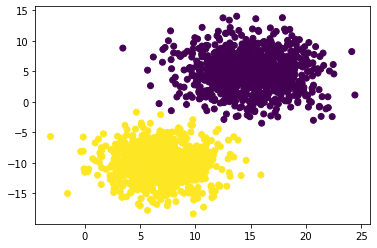

In [ ]:
amount = 1000
means1, means2 = (15, 5), (7, -10)
X1 = np.random.multivariate_normal(means1, 9*np.identity(2),amount)
X2 = np.random.multivariate_normal(means2, 6*np.identity(2),amount)
X = np.concatenate([X1, X2])
Y = np.ones(2*amount)
Y[:amount] = 0
Y[amount:] = 1
indexes = np.arange(2*amount)
random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
print("shape of array",X.shape, Y.shape)
plt.scatter(X[:,0], X[:,1], c=Y)


In [ ]:
clf = GaussianMixture(n_components=2, covariance_type='full').fit(X)


In [ ]:
print("PREDICTED MEANS ",str(clf.means_[1]), str(clf.means_[0]))
print('ACTUAL MEANS :',means2, means1)


PREDICTED MEANS  [  6.97192999 -10.04820481] [14.98563733  4.93785262]
ACTUAL MEANS : (7, -10) (15, 5)


In [ ]:
print("Predicted cov : \n", clf.covariances_)
print("Real cov :\n", 9*np.identity(2),'\n', 6*np.identity(2))


Predicted cov : 
 [[[ 8.90599865 -0.57482741]
  [-0.57482741  8.88666925]]

 [[ 6.54369771 -0.24084262]
  [-0.24084262  6.68206218]]]
Real cov :
 [[9. 0.]
 [0. 9.]] 
 [[6. 0.]
 [0. 6.]]


 **NLP**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
import re

from wordcloud import WordCloud, STOPWORDS


In [71]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset (1).csv


In [72]:
text_df = pd.read_csv("spam_ham_dataset.csv")
text_df.head()
text_df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [73]:
text_df["text"] = text_df["text"].map(lambda x: re.sub(r'[^\w]', ' ', x))#delete unimportant symbols


In [85]:
def delete_stopwords(str_x):
    words = str_x.split(' ')
    neutral_words = ['subject','Subject', 'say', 'td', 'subject re', 'go', 'back', 'take', 'see', 'look', 'day',
                     'need', 'width', 'thing', 'want', 'make', 'now']
    new_words = list()
    for word in words:
        if word not in stopwords.words('english') or word not in neutral_words:
            new_words.append(word)
    return ' '.join(new_words)


In [81]:
from nltk.corpus import stopwords
from nltk import download

In [78]:
download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


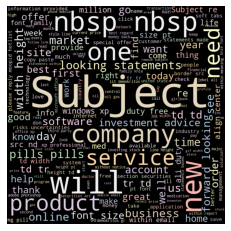

In [86]:
text_df["text"] = text_df["text"].map(delete_stopwords)
spam_df = text_df[ text_df["label"] == "spam"]
spam_df.head()
spam_words = ' '.join(list(spam_df["text"].values))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                colormap='Pastel1',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(spam_words)

plt.imshow(wordcloud)
plt.axis("off") 
plt.show()


In [87]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(text_df["text"].values)
Y = text_df.iloc[:, :1].values

clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, Y)
print("Accuracy:", str(clf.score(X, Y)))


Accuracy: 0.15490233997292593
